['1', 'Screen1', '1280x720.txt']
1_Screen1_1280x720.png


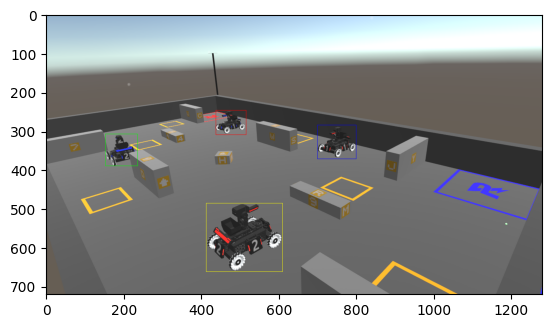

['1', 'Screen2', '1280x720.txt']
1_Screen2_1280x720.png


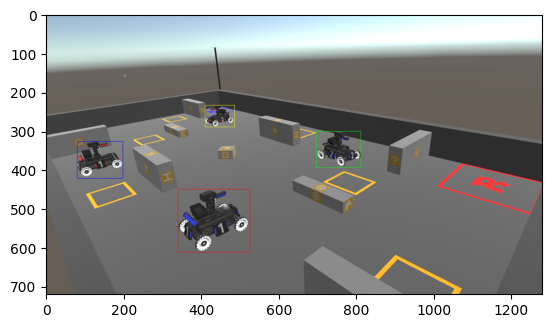

In [1]:
from pathlib import Path
import pandas as pd
import cv2
import matplotlib.pyplot as plt

label_root = Path("../dataset/arms/labels/train/")
image_root = Path("../dataset/arms/images/train/")

i = 0

for label_file in label_root.iterdir():

    image_file = label_file.name.replace(".txt",".png")
    image_type = str(label_file.name).split('_')

    # print(label_file)
    if image_type[0] == "1":
        print(image_type)
        print(image_file)
        # read labels
        df = pd.read_csv(label_file,sep=" ",names=['id','center-x','center-y','w','h'])
        df = df.sort_values(by='id')

        # read images
        img = cv2.imread("../dataset/arms/images/train/" + image_file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h,w = img.shape[:2]

        df[['center-x','w']] = df[['center-x','w']].apply(lambda x:x*w)
        df[['center-y','h']] = df[['center-y','h']].apply(lambda x:x*h)

        df['x1'] = df['center-x']-df['w']/2
        df['x2'] = df['center-x']+df['w']/2
        df['y1'] = df['center-y']-df['h']/2
        df['y2'] = df['center-y']+df['h']/2

        df[['x1','x2','y1','y2']] = df[['x1','x2','y1','y2']].astype('int')

        points = zip(df['id'], df['x1'], df['y1'], df['x2'], df['y2'])

        for point in points:

            if point[0] == 0:
                img = cv2.rectangle(img,point[1:3],point[3:],color=(255, 0, 0),thickness=1)
            elif point[0] == 1:
                img = cv2.rectangle(img,point[1:3],point[3:],color=(0, 255, 0),thickness=1)
            elif point[0] == 2:
                img = cv2.rectangle(img,point[1:3],point[3:],color=(0, 0, 255),thickness=1)
            elif point[0] == 3:
                img = cv2.rectangle(img,point[1:3],point[3:],color=(255, 255, 0),thickness=1)

        plt.imshow(img)
        plt.show()